##           CA3 Integrated Assignment

### 1.	Introduction

The auction is a practice to buy or sell that does not involve negotiation between the parties, that is, there is always an auction company that intermediates the negotiation. Then interested parties bid and whoever makes the best offer buys the property, as long as the value reach the seller’s expectation.

Frauds can happen in auctions, a very common fraud in auctions is shill bid. They usually have a shill bidding, but that in most cases doesn't win the auction. They use this device to get the attention of a real auction participant to initiate bids and also to increase the value of the property.

The dataset that we will use in this study is data from eBay auctions of a popular product.


###  2. Methods and Results

#### 2.1  Business Understanding

In this present study we want better understand the dataset, check for anomalies and using machine learning Classification model detect possible future shill bidding, then avoid this type of fraud in eBay on-line auction.

#### 2.2 Data Understanding

Data understanding is related to the collection and exploration of the data. This stage is extremely important for familiarization with the data, ensuring reliability, quality and relevance. Once there is an understanding of the data, modeling becomes much easier.

It is important to verify if these data have what is needed for the project demands, that is, if they are correct, coherent and cohesive.


#####        Characterisation of the data set

The first step is the characterisation of the data set, in this step we can verify, the data set size, feature type, number of feature, number of observations, is has missing values and if have duplicate observations.

Making a previous analysis of the dataset, I verified that the dataset have 6321 observations and 13 variables, being 1 variable of the object type and 12 variables of the numeric type. There are no missing values and no duplicates observations.

All analyzes are presented in the codes below.

In [1]:
# Importing libraries
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
sns.set()
from pathlib import Path 
import pandas as pd
import sklearn.preprocessing as preproc
import warnings

from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import cross_val_score     
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from time import time

In [2]:
# Read csv file into a pandas dataframe
df = pd.read_csv("data/Shill Bidding Dataset.csv")

In [3]:
# Take a look at the first few rows
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [4]:
# verify information about dataframe - number of columns number of obvervation and type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [5]:
# verify the feature type
df.dtypes

Record_ID                   int64
Auction_ID                  int64
Bidder_ID                  object
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

In [6]:
# Take a look at the last few rows
df.tail()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0
6320,15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.000000,7,0


In [7]:
df.shape

(6321, 13)

In [8]:
df.isnull().values.any()

False

In [9]:
# verify if the data set have duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 13)


#####  Exploratory Data Analysis

Exploratory Data Analysis (EDA) is used to analyse and investigate datasets and summarize 
their key characteristics, often using data visualization methods. It allows you to define the 
best way to control data sources to get the answers you need, making it easier to discover 
patterns, detect anomalies. 

EDA is used to provide a better understanding of variables in the dataset and relationships 
between them.

We use EDA to ensure that the results produced are valid and applicable to any desired business outcomes and goals. Once the EDA is complete and the insights are defined, its capabilities can then be used for preparing the dataset for modelling or analysis.

Through summary statistics analysis, we were able to notice that the most of features are number between 0 and one because they present the minimum 0 and maximum 1. The feature Auction_Duration presents discrete values between 1 and 10, because the minimum value is 1 and the maximum value is 10.

With the histogram we can verify the behavior of the data in each feature, that is, we can verify the distribution of the data in each featureData preparation. In this study we can verify that the feature with values between 0 and 1, they present more values close to zero than close to 1.

The values in the features Record_ID and Auction_ID presents values distributed almost equally because they are feature to identify the record and the auction, then each observation have different values, it means that they are distributed equally.

The box plot provides information about the following characteristics of the dataset like dispersion, skewness, tail length and outliers. In this study we are using the box plot to identify if the features have outliers. It is very important to identify outliers because, in order, to proceed with the analysis, we need to verify if it is an error, if this information is important for the result, and then make the decision to remove or treat it and then proceed with the analysis.

We can verify that the features Bidder_Tendency, Successive_Outbidding and Bidding_Ratio have outliers. The feature Successive_Outbidding have just 3 values, 0, 0.5 and 1, and the most of values are 0, because of this the box plot considers 0.5 and 1 outliers, so we cannot delete these observations.

The are no missing values in this dataset.

The feature class that is our dependent variable is a feature that classify the bidding where 0 is normal behavior bidding and 1 is abnormal behavior bidding. In a exploratory analysis we can verify that is a imbalanced dataset where the proportion of 0 is higher than proportion of 1.

All analyzes are presented in the codes below.

In [10]:
# summary statistics analysis

df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


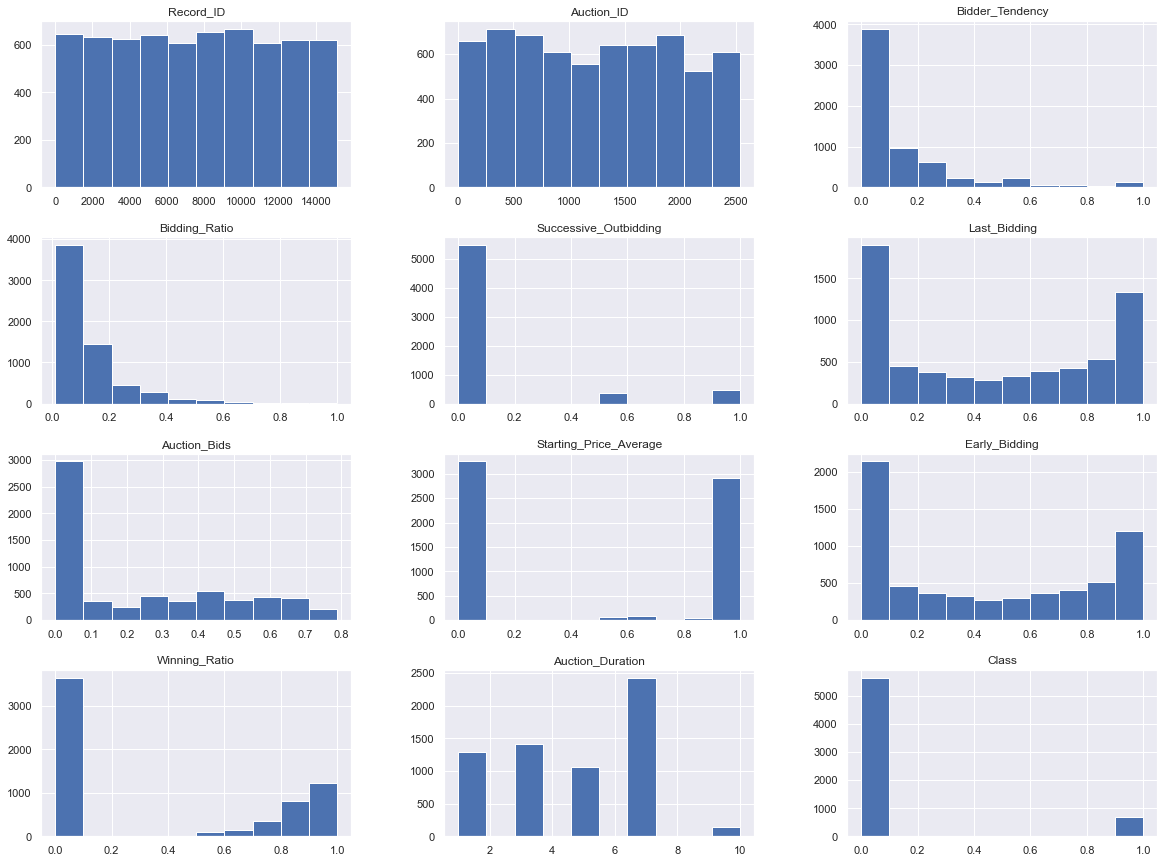

In [11]:
# histogram to analize the feature distribution
df.hist(figsize = (20,15));


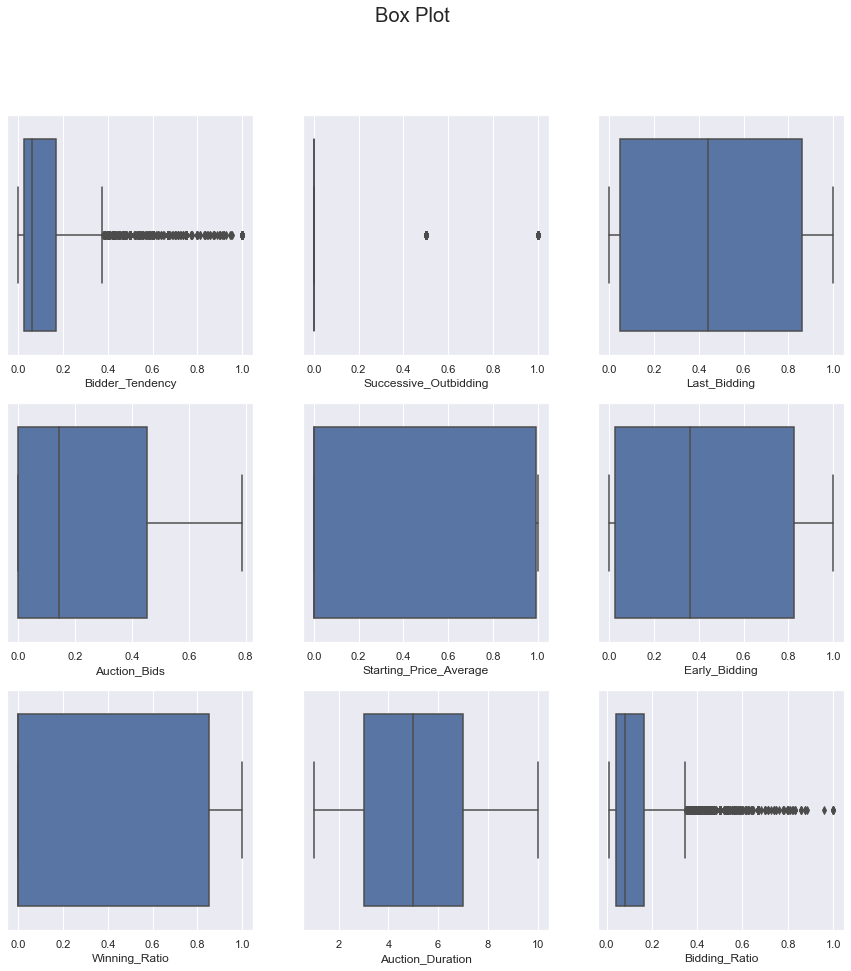

In [12]:
#box plot to analyze distribution and outliers
sns.set_theme()
figure, axis = plt.subplots(3,3, figsize = (15,15))
figure.suptitle('Box Plot', fontsize=20)

sns.boxplot(x = df['Bidder_Tendency'], ax = axis[0,0])
sns.boxplot(x = df['Successive_Outbidding'], ax = axis[0,1])
sns.boxplot(x = df['Last_Bidding'], ax = axis[0,2])
sns.boxplot(x = df['Auction_Bids'], ax = axis[1,0])

sns.boxplot(x = df['Starting_Price_Average'], ax = axis[1,1])
sns.boxplot(x = df['Early_Bidding'], ax = axis[1,2])
sns.boxplot(x = df['Winning_Ratio'], ax = axis[2,0])
sns.boxplot(x = df['Auction_Duration'], ax = axis[2,1])
sns.boxplot(x = df['Bidding_Ratio'], ax = axis[2,2])
plt.show();


In [13]:
# verify if there is missing values
df.isna().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [14]:
df['Successive_Outbidding'].value_counts()

0.0    5478
1.0     469
0.5     374
Name: Successive_Outbidding, dtype: int64

In [15]:
df["Class"].value_counts()

0    5646
1     675
Name: Class, dtype: int64

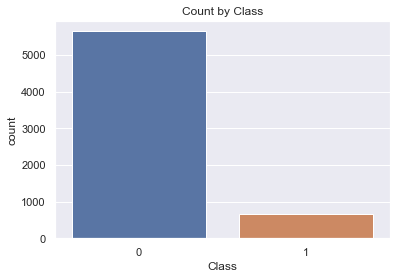

None
0    5646
1     675
Name: Class, dtype: int64


In [16]:
sns.countplot(df['Class']).set_title('Count by Class')
print(plt.show())
print(df.Class.value_counts())


##### Cleaning Dataset

Cleaning Dataset is a way of cleaning and validating information in the dataset. So they become really actionable and useful for the business. That is because many captured files do not always mean much. To have a good result in our analysis the information in the dataset needs to be of good quality.

The dataset used in this study have no missing values, and the outliers will be kept.

The features Record_ID, Auction_ID and Bidder_ID are feature to identify the record, auction and bidder then in this study there are not important, so these features will be dropped.


In [17]:
df1 = df.drop(columns = ['Record_ID', 'Auction_ID', 'Bidder_ID'])

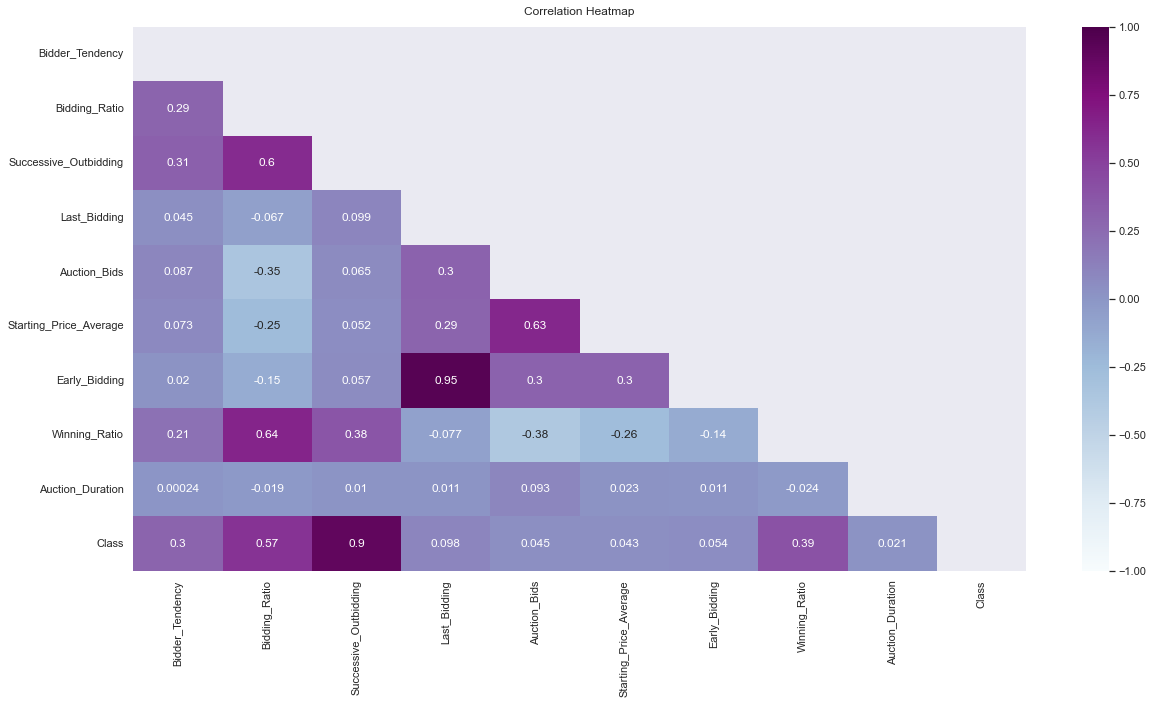

In [18]:
# heatmap to analyze correlation between features
plt.figure(figsize=(20,10))
c= df1.corr()
mask = np.triu(np.ones_like(c, dtype=np.bool))

heatmap=sns.heatmap(c,cmap="BuPu", mask=mask, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [19]:
df1.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [20]:
class_feature_means = pd.DataFrame() 
for c, rows in df1.groupby('Class'):
    rows = rows.drop(["Class"], axis=1)
    class_feature_means[c] = rows.mean()
class_feature_means

,0,1
Bidder_Tendency,0.122403,0.310979
Bidding_Ratio,0.101775,0.344268
Successive_Outbidding,0.016649,0.832593
Last_Bidding,0.450286,0.570463
Auction_Bids,0.227638,0.264797
Starting_Price_Average,0.465605,0.533181
Early_Bidding,0.423630,0.489674
Winning_Ratio,0.308242,0.865322
Auction_Duration,4.597060,4.765926


##### Data Preparation

Data preparation consists of collecting, cleaning and transforming the data, so that it can be processed and qualified. It usually involves reformatting, correcting, and combining sets of information so that they are enriched and validated. In other words, it organizes and adjusts the data so that they gain meaning and can be used in decision making.

One of the main goals of data preparation is to ensure that the resulting information will be accurate and consistent. Thus, allowing a valid and realistic analysis.

As the dataset presents a variable with a different scale from the other features, in order to have a better performance of the model and avoid overfitting, we will transform the variables so that they are all on the same scale, that is, standardized. In this study, the minmax method was used, as the other variables were already on the scale between 0 and 1, so this method was chosen to standardize the features.

In this study we will use dimensionality reduction techniques. Dimensionality reduction is used to reduce the number of features without losing important information. Here we will use the PCA and LDA techniques and compare the results of the two techniques, that is, which one had the best performance in this study.

How we can see in the Exploratory Data Analysis, the dataset is imbalanced, so we need to apply some technique for balanced the dataset, because if we work with imbalanced dataset, we can have a bias results, so to avoid that, we need to balance the dataset. For this we used SMOTE technique, that is a technique that can be used for oversampling data. This technique creates new synthetics oversampling through substitutions. SMOTE introduces synthetic examples in the line segments for oversampling the minority class samples. It joins every minority class that is close to its neighbors. The choice of neighbors from the nearest neighbors is random. The number depends on how much oversampling the model needs.
In this case, before we had 5646 observations Class = 0 and 675 observations Class = 1, after apply the SMOTE technique, 5646 observations Class = 0 and 5646 observations Class = 1.
Principal Component Analysis (PCA) is an unsupervised multivariate analysis technique that can be used to analyze interrelationships between a large number of variables and explain these variables in small dimension.

Starting from the premise that the variables show a certain degree of association between them, it is desirable to replace them with uncorrelated variables that contain almost all the information in the original data, especially if components is much smaller than the original data. This feature would facilitate the description of the data, provided that the loss of information was as little as possible.

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique. It is used to model differences in groups, that is, to separate two or more classes. It is used to project features in a higher dimensional space into a lower dimensional space.

PCA ignore the class label while LDA consider the class label.

With the application of the PCA, we had a reduction in the size from 9 to 7 with a variance of 95%

The LDA always reduced by one from number of classes we have represented as a target feature. LDA creates a clear separation between classes. In this study how we have only 2 classes the LDA presents only 1 component.

Analysing the plots with the PCA and LDA results we can visualize that the LDA have a clear separation between classes does not present this separation.

How LDA presents a clear separation between the classes we will use the LDA to apply the Machine Learning models.

After deciding that, we need to split our data between training and testing because when the model is fitted to predict, it is important to know the model predictive ability, in addition to the data it was trained on. For this reason, it is common to separate the dataset into training and testing.

In this study we spitted the dataset with 80% training and 20% testing.

After applying the techniques mentioned above, the dataset is ready to apply models.

All analyses are presented in the codes below.

In [21]:
df_no_label = df1.drop(columns = ["Class"])

In [22]:
df_minmax = preproc.minmax_scale(df_no_label)

In [23]:
X = df_minmax
y = df1['Class']

In [24]:
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 5646, 1: 675})
Resampled dataset shape Counter({0: 5646, 1: 5646})


In [25]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_res,y_res)
pca.n_components_

7

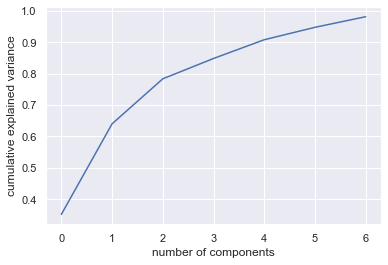

In [26]:
pca = PCA(0.95)
pca.fit(X_res,y_res) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [27]:
var_plot  = pd.DataFrame(y_res)

In [28]:
var_plot['plot'] = 0

In [29]:
plot = var_plot['plot']

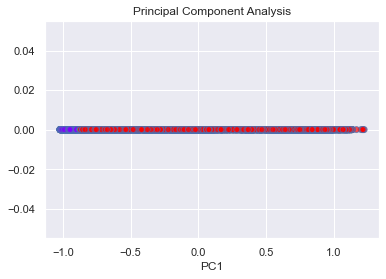

In [30]:
plt.xlabel("PC1")
plt.title("Principal Component Analysis")
plt.scatter(X_pca[:,0],
           plot,
           c=y_res,
           cmap="rainbow",
           alpha=0.7,
           edgecolors="b");

In [31]:
lda = LinearDiscriminantAnalysis()
X_lda =lda.fit_transform(X_res,y_res)

In [32]:
lda.explained_variance_ratio_

array([1.])

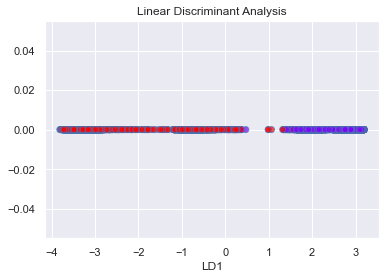

In [33]:
plt.xlabel("LD1")
plt.title("Linear Discriminant Analysis")
plt.scatter(X_lda[:,0], 
            plot,
           c=y_res,
           cmap="rainbow",
           alpha=0.7,
           edgecolors="b");

In [34]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_res, test_size = 0.2, random_state=42)

### 3. Modelling

Supervised learning is when the dataset have input feature (x) and an output feature (Y) and you use an algorithm to learn the mapping function from the input to the output (Brownlee, 2016).

Unsupervised learning is when the dataset only has input features (X) and no corresponding output feature. The goal of unsupervised learning is to model the underlying structure or distribution in the data to learn more about them (Brownlee, 2016).

As our dataset has input features and output feature, we will use a supervised learning in this study.

Supervised learning is grouped into Regression and Classification. A Regression method is when the output feature is a continue numeric value and Classification method is when the output feature is a categorical feature.

The output feature in this study is a feature Class that is a categorical feature, thus, we are going to use Classification method.

To verify which model presented a better fit, we adjusted the models KNN, Decision Tree, Random Forest, SVM and Logistic Regression and we compared the scores. 

KKN algorithm tries to find the closest K points to a specific point in order to infer the predict value.

The Random Forest algorithm creates multiple decision trees and combines them to obtain a more accurate and more stable prediction.

Decision Tree Classification establishes nodes that are related to each other by a hierarchy. 

Support Vector Classification seeks to find the best hyperplane for a given data set whose classes are linearly separable. 

Logistic Regression studies the relationship between the dependent variable and one or more independent variables. This relationship is represented by means of a mathematical model, that is, by an equation that associates the dependent variable with the independent variables. 

The models that present the best scores were KNN and Logistic Regression KNN presents a score 0.9876 and Logistic Regression score 0.9845.
As they were performing well, applying tuning hyperparameter showed improvement, but it was very small.

All models perform very well. The KNN score was 0.9880 and Logistic Regression score was 0.9867.

Analysing the confusion matrix, we can see that 21 values were predicted as False Positive and only 6 values were predicted as False Negative in KNN algorithm. In Logistic Regression 24 values were predicted as False Positive and only 6 values were predicted as False Negative. Thus, KNN perform better than Logistic Regression.

We could see that in both models, the cross validation performing very close in training and test it means the model is not underfitted or overfitted


All analyses are presented in the codes below.

In [35]:
classifiers = {
    "KNN"       : KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier(), 
    "SVM"   : SVC(), 
    "LogisticRegr" : LogisticRegression()
}

In [36]:
results = []
names = []
nfast = 6      
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    cv_results = cross_val_score(classifier, X_train, y_train, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    score_time = time()-start
    print("{:<15}| score = {:.4f} | time = {:,.4f}s/{:,.4f}s".format(name, score, train_time, score_time))

KNN            | score = 0.9876 | time = 0.0050s/0.2190s
Decision Tree  | score = 0.9810 | time = 0.0045s/0.0386s
Random Forest  | score = 0.9810 | time = 0.4445s/1.7297s
SVM            | score = 0.9845 | time = 0.1765s/0.7390s
LogisticRegr   | score = 0.9845 | time = 0.0164s/0.0313s


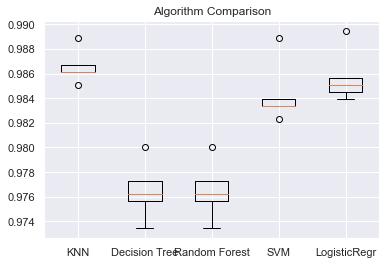

In [37]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

##### Logistic Regression

In [38]:
# Tuning hyper-parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [39]:
# Grid search cross validation
logistic_regression = LogisticRegression()
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=grid, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_lda, y_res)

In [40]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.986893 using {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [41]:
logreg = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1143
           1       0.98      0.99      0.99      1116

    accuracy                           0.99      2259
   macro avg       0.99      0.99      0.99      2259
weighted avg       0.99      0.99      0.99      2259

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')
0.9867197875166003


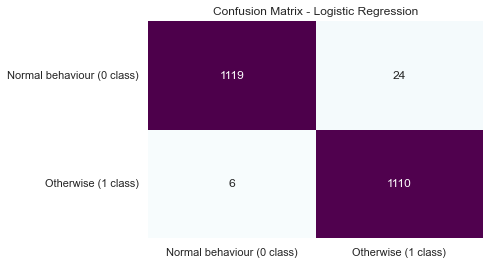

In [42]:
print(classification_report(y_test, y_pred_log))
print(sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='BuPu').set_title('Confusion Matrix - Logistic Regression'))
print(accuracy_score(y_test, y_pred_log));

In [43]:
print('Training score - Logistic Regression: {:.4f}'.format(logreg.score(X_train,y_train)))
print('Testing score - Logistic Regression: {:.4f}'.format(logreg.score(X_test,y_test)))

Training score - Logistic Regression: 0.9870
Testing score - Logistic Regression: 0.9867


##### KNN 

In [44]:
knn = KNeighborsClassifier()
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, scoring='accuracy')
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [45]:
print(grid_search.best_params_)

{'n_neighbors': 19}


In [46]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1143
           1       0.98      0.99      0.99      1116

    accuracy                           0.99      2259
   macro avg       0.99      0.99      0.99      2259
weighted avg       0.99      0.99      0.99      2259

Text(0.5, 1.0, 'Confusion Matrix - KNN')
0.9880478087649402


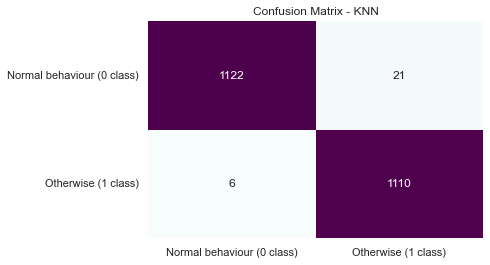

In [47]:
print(classification_report(y_test, y_pred_knn))
print(sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='BuPu').set_title('Confusion Matrix - KNN'))
print(accuracy_score(y_test, y_pred_knn));

In [48]:
print('Training score - KNN: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing score - KNN: {:.4f}'.format(knn.score(X_test,y_test)))

Training score - KNN: 0.9876
Testing score - KNN: 0.9880


In [49]:
models = {
    "KNN"       : KNeighborsClassifier(n_neighbors=19), 
    "LogisticRegr" : LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
}

In [50]:
results = []
results_test = []
names = []
nfast = 3      
head = list(models.items())[:nfast]

for name, model in head:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = model.score(X_test, y_test)
    cv_results = cross_val_score(model, X_train, y_train, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    score_time = time()-start
    print("{:<15}| score = {:.4f} | time = {:,.4f}s/{:,.4f}s".format(name, score, train_time, score_time))

KNN            | score = 0.9880 | time = 0.0000s/0.2314s
LogisticRegr   | score = 0.9867 | time = 0.0000s/0.0231s


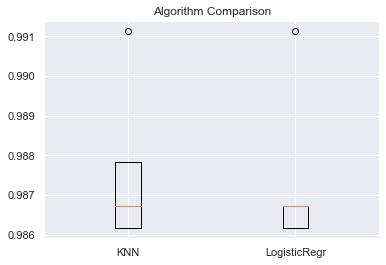

In [51]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

###    4. Conclusion

After developing this work and analysing all the models developed, I can conclude based on the adherence results of the models that for among the 3 models the one that presented the best result was the KNN, but presents few difference between them.

The hyperparameters showed a small improvement in both models, but how the both models were performed very well the improvement is not high.

How we could see that the both models performing very close in training and testing in cross validation, then we can conclude that the models can help the company detect possible future shill bidding.


### Appendix

Data Dictionary

•	Record ID: Unique identifier of a record in the dataset.

•	Auction ID: Unique identifier of an auction.

•	Bidder ID: Unique identifier of a bidder.

•	Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.

•	Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.

•	Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.

•	Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90% of the auction duration) to avoid winning the auction.

•	Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.

•	Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.

•	Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25% of the auction duration) to get the attention of auction users.

•	Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.

•	Auction Duration: How long an auction lasted.

•	Class: 0 for normal behaviour bidding; 1 for otherwise.